<a href="https://colab.research.google.com/github/emirozyesil/DSA-210-term-project/blob/main/notebooks/03_hypothesis_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144482 entries, 0 to 144481
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gameId                  144482 non-null  int64  
 1   gameDateTimeEst         144480 non-null  object 
 2   teamName                144482 non-null  object 
 3   opponentTeamName        144482 non-null  object 
 4   home                    144482 non-null  int64  
 5   win                     144482 non-null  int64  
 6   teamScore               144482 non-null  int64  
 7   opponentScore           144482 non-null  int64  
 8   q1Points                3474 non-null    float64
 9   q2Points                3474 non-null    float64
 10  q3Points                3472 non-null    float64
 11  q4Points                3472 non-null    float64
 12  Q3_diff                 3472 non-null    float64
 13  foulsPersonal           140490 non-null  float64
 14  opponentFoulsPersona

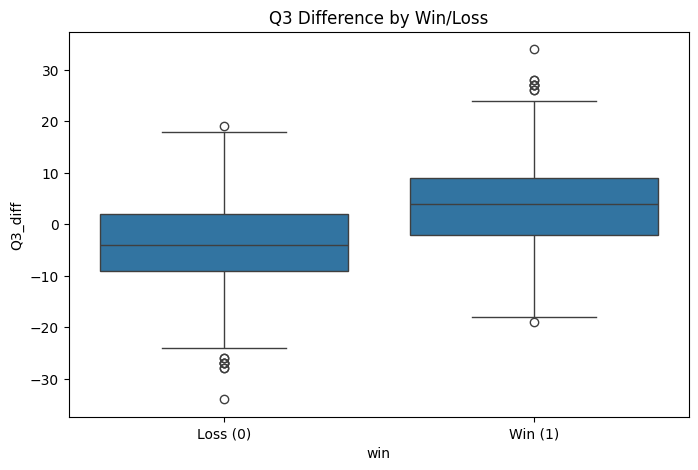

T-Statistic: 26.694875248908044
P-Value: 5.953000206330415e-143
Conclusion: Reject H0 → There is a statistically significant difference in Q3 performance between winning and losing teams.
Mean Foul_diff (Winners): -1.261215598616114
Mean Foul_diff (Losers): 1.261215598616114


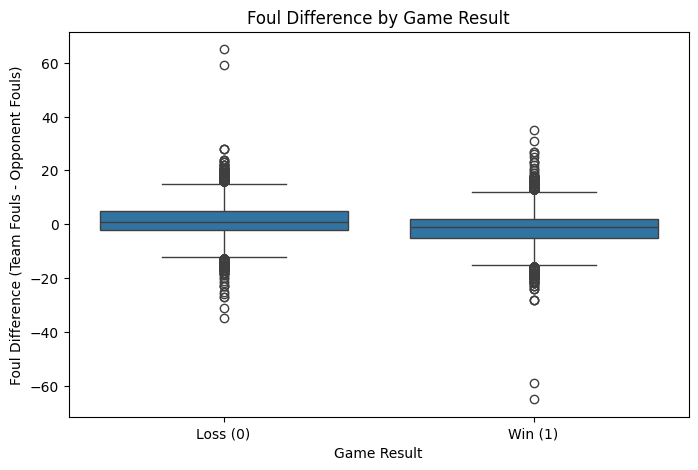

T-Statistic: -90.03150270993582
P-Value: 0.0
Conclusion: Reject H0 → Foul differences are statistically different between winning and losing teams.
Mean 3PA Ratio (Winners): 0.2246318725660285
Mean 3PA Ratio (Losers): 0.2259576896792002


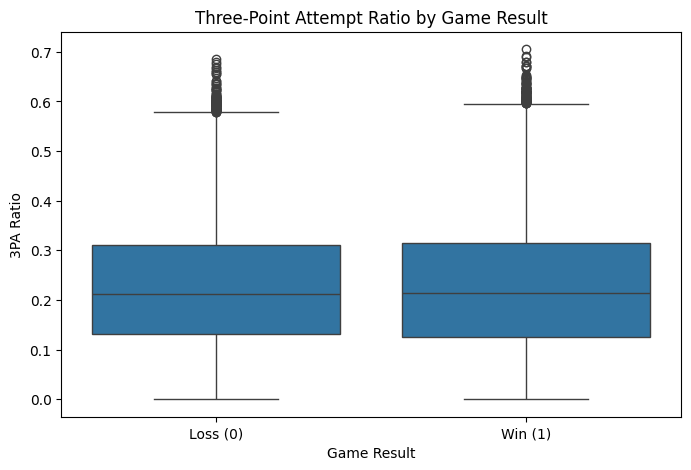

T-Statistic: -1.6975294751162247
P-Value: 0.08959960980643622
Conclusion: Fail to reject H0 → 3PA ratio is not significantly different between winners and losers.
All hypothesis tests completed successfully.


In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)

# Enriched dataset'i oku
df = pd.read_csv("/content/nba_games_enriched.csv")

df.head()
df.info()
df.isna().sum()
q3_df = df[["win", "Q3_diff"]].dropna()

winners_q3 = q3_df[q3_df["win"] == 1]["Q3_diff"]
losers_q3  = q3_df[q3_df["win"] == 0]["Q3_diff"]

winners_q3.mean(), losers_q3.mean()
sns.boxplot(data=q3_df, x="win", y="Q3_diff")
plt.xticks([0,1], ["Loss (0)", "Win (1)"])
plt.title("Q3 Difference by Win/Loss")
plt.show()
t_stat, p_val = stats.ttest_ind(winners_q3, losers_q3, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

alpha = 0.05

if p_val < alpha:
    print("Conclusion: Reject H0 → There is a statistically significant difference in Q3 performance between winning and losing teams.")
else:
    print("Conclusion: Fail to reject H0 → No statistically significant difference in Q3 performance.")

foul_df = df[["win", "Foul_diff"]].dropna()

winners_foul = foul_df[foul_df["win"] == 1]["Foul_diff"]
losers_foul  = foul_df[foul_df["win"] == 0]["Foul_diff"]

print("Mean Foul_diff (Winners):", winners_foul.mean())
print("Mean Foul_diff (Losers):", losers_foul.mean())
sns.boxplot(data=foul_df, x="win", y="Foul_diff")
plt.xticks([0,1], ["Loss (0)", "Win (1)"])
plt.title("Foul Difference by Game Result")
plt.xlabel("Game Result")
plt.ylabel("Foul Difference (Team Fouls - Opponent Fouls)")
plt.show()
t_stat, p_val = stats.ttest_ind(winners_foul, losers_foul, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

alpha = 0.05

if p_val < alpha:
    print("Conclusion: Reject H0 → Foul differences are statistically different between winning and losing teams.")
else:
    print("Conclusion: Fail to reject H0 → No significant difference in foul behavior between winners and losers.")

three_df = df[["win", "threePA_ratio"]].dropna()

winners_3 = three_df[three_df["win"] == 1]["threePA_ratio"]
losers_3  = three_df[three_df["win"] == 0]["threePA_ratio"]

print("Mean 3PA Ratio (Winners):", winners_3.mean())
print("Mean 3PA Ratio (Losers):", losers_3.mean())
sns.boxplot(data=three_df, x="win", y="threePA_ratio")
plt.xticks([0,1], ["Loss (0)", "Win (1)"])
plt.title("Three-Point Attempt Ratio by Game Result")
plt.xlabel("Game Result")
plt.ylabel("3PA Ratio")
plt.show()
t_stat, p_val = stats.ttest_ind(winners_3, losers_3, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

alpha = 0.05

if p_val < alpha:
    print("Conclusion: Reject H0 → Winning teams have a statistically different (typically higher) 3PA ratio.")
else:
    print("Conclusion: Fail to reject H0 → 3PA ratio is not significantly different between winners and losers.")
print("All hypothesis tests completed successfully.")
